# A/B Testing and Binomial Analysis for Marketing Campaign Evaluation

## Problem Description

Marketing companies aim to run successful campaigns, but the market is complex, and several options can work. Therefore, they often conduct A/B tests, a randomized experimentation process in which two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people simultaneously to determine which version has the maximum impact and drives business metrics.

Companies seek to answer two fundamental questions:

1. Would the campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, it is common to conduct an A/B test. The majority of people will be exposed to ads (the experimental group), while a small portion of people (the control group) will see a Public Service Announcement (PSA) (or nothing) in the exact size and place where the ad would normally appear.

The goal of this dataset is to analyze the groups, determine if the ads were successful, calculate the company's revenue potential from the ads, and assess whether the difference between the groups is statistically significant.

## Possible Solutions

1. **A/B Testing:** Evaluate the performance of marketing campaigns by comparing conversion rates between the experimental group (exposed to ads) and the control group (exposed to PSA or nothing).

2. **Binomial Testing:** Analyze the effectiveness of ads through binomial tests, allowing the assessment of conversion proportions and the identification of significant differences.

3. **Sample Size Determination:** Use statistical methods to calculate the minimum sample size needed to ensure adequate statistical power in the tests.

## Notebook Structure

1. **Introduction:**
   - Problem description and objectives.
   
2. **Data Exploration:**
   - Initial analysis of the dataset to understand its structure and characteristics.
   
3. **A/B Testing:**
   - Implementation of A/B testing to compare conversion rates between groups.
   
4. **Binomial Tests:**
   - Application of binomial tests to assess the effectiveness of ads.
   
5. **Sample Size Determination:**
   - Calculation of the minimum sample size to ensure statistically robust results.
   
6. **Conclusions:**
   - Summary of findings and recommendations based on the obtained results.

## Additional Considerations

- Inclusion of graphical visualizations to facilitate the interpretation of results.
- Detailed documentation of the steps and codes used.
- Reserved space for the inclusion of relevant images, performance charts, etc.


In [1]:
import os

# Set the main directory
os.chdir(r'C:\Users\wokra\Desktop\github\abtest')

# Check if the directory has been changed
print(os.getcwd())

C:\Users\wokra\Desktop\github\abtest


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
from src.abtest import abplot_func
from src.abtest import amostra_min

In [3]:
# LOAD FILE
df = pd.read_csv("data/raw/marketing_AB.csv")

2. **Data Exploration:**

In [4]:
# VIEW DF
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
# REMOVE UNUSED COLUMNS
df = df.drop(["Unnamed: 0", "total ads", "most ads hour", "most ads day"], axis=1)

In [6]:
# CREATING A LAMBDA FUNCTION TO RENAME AND REMOVE SPACES
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [7]:
# VIEW THE COUNT OF VALUES BETWEEN CONVERTED AND NOT CONVERTED
df["converted"].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [8]:
# RENAMING THE CONVERTED COLUMN
df.loc[df["converted"] == True, "converted"] = 1
df.loc[df["converted"] == False, "converted"] = 0

In [9]:
# VIEWING AGAIN
df.head()

,user_id,test_group,converted
0,1069124,ad,0
1,1119715,ad,0
2,1144181,ad,0
3,1435133,ad,0
4,1015700,ad,0


In [10]:
# SEARCHING FOR NULL VALUES
df.isnull().sum()


user_id       0
test_group    0
converted     0
dtype: int64

In [11]:
# SEARCHING FOR DUPLICATED ROWS
df.duplicated().sum()


0

3. **A/B Testing:**

In [12]:
# VIEWING THE COUNT OF RECORDS PER GROUP
df["test_group"].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [13]:
# RENAMING THE GROUPS, ASSIGNING "A" TO THE CONTROL GROUP AND "B" TO THE TEST GROUP
df.loc[df["test_group"] == "ad", "test_group"] = "B"
df.loc[df["test_group"] == "psa", "test_group"] = "A"

In [14]:
# CREATING EXCLUSIVE DFs FOR THE GROUPS
df_a = df[df["test_group"] == "A"]
df_b = df[df["test_group"] == "B"]

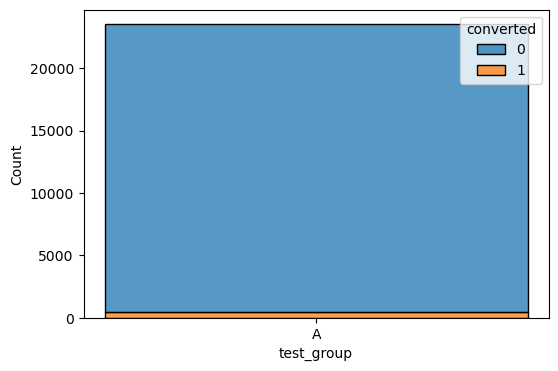

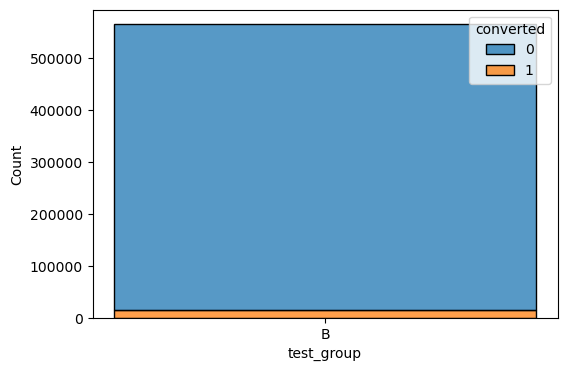

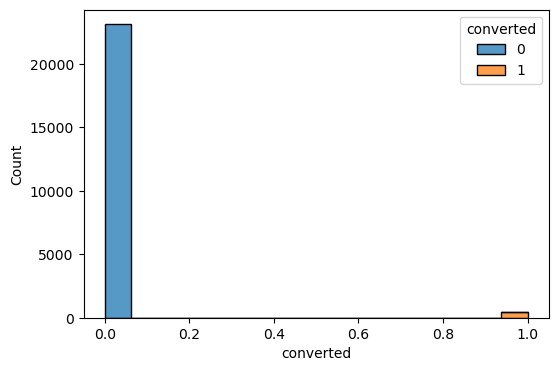

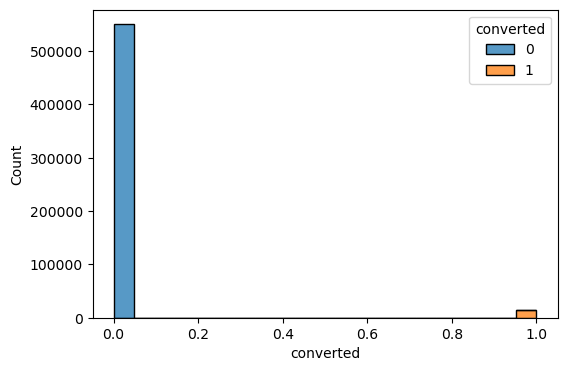

In [15]:
# GENERATING GROUP GRAPHS

for i in df.columns.drop(["user_id"]).to_list():
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_a, x=i, hue="converted", multiple="stack")
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_b, x=i, hue="converted", multiple="stack")
    plt.show()

In [16]:
# CREATING A GROUPBY TO SEPARATE GROUPS BY CONVERTED VALUE
counts = df.groupby('test_group')['converted'].value_counts()


In [17]:
# TOTAL CONVERTED
convertido_A = counts[1]
convertido_B = counts[3]

# SAMPLE SIZE
total_A = counts[0] + counts[1]
total_B = counts[2] + counts[3]

# CONVERSION PERCENTAGE
p_conversao_a1 = counts[1] / (sum(counts[[0, 1]]))
p_conversao_b1 = counts[3] / (sum(counts[[2, 3]]))


4. **Binomial Tests:**

Text(0, 0.5, 'Probability')

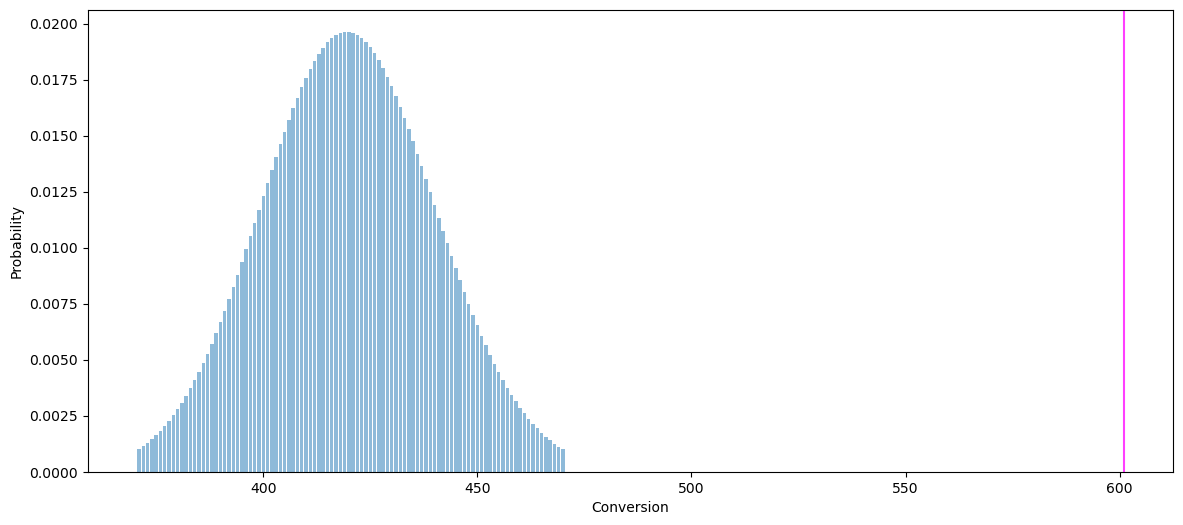

In [18]:
# Plot of the distribution of group A (control)

# Plotting area
fig, ax = plt.subplots(figsize=(14, 6))

# Test of A
x = np.linspace(convertido_A - 49, convertido_A + 50, 100)
y = scs.binom(total_A, p_conversao_a1).pmf(x)

# Create the vertical bar
ax.bar(x, y, alpha=0.5)
ax.axvline(x=p_conversao_b1 * total_A, c='magenta', alpha=0.75, linestyle='-')

# Labels
plt.xlabel('Conversion')
plt.ylabel('Probability')


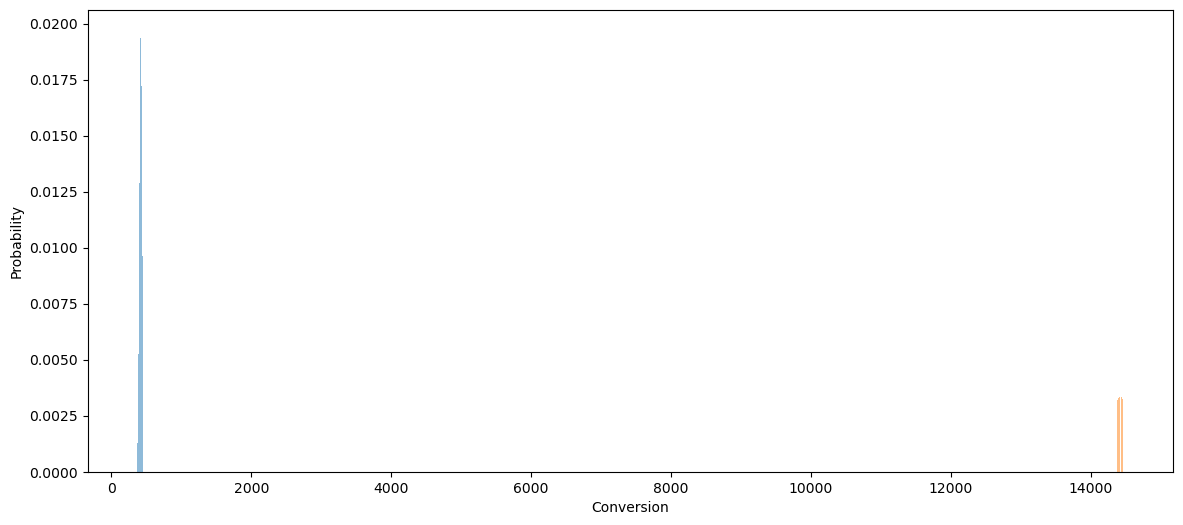

In [19]:
# Plot of the distribution of the 2 groups

# Plotting area
fig, ax = plt.subplots(figsize=(14, 6))

# A Graph
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha=0.5)

# B Graph
xB = np.linspace(convertido_B - 49, convertido_B + 50, 100)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha=0.5)

plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()

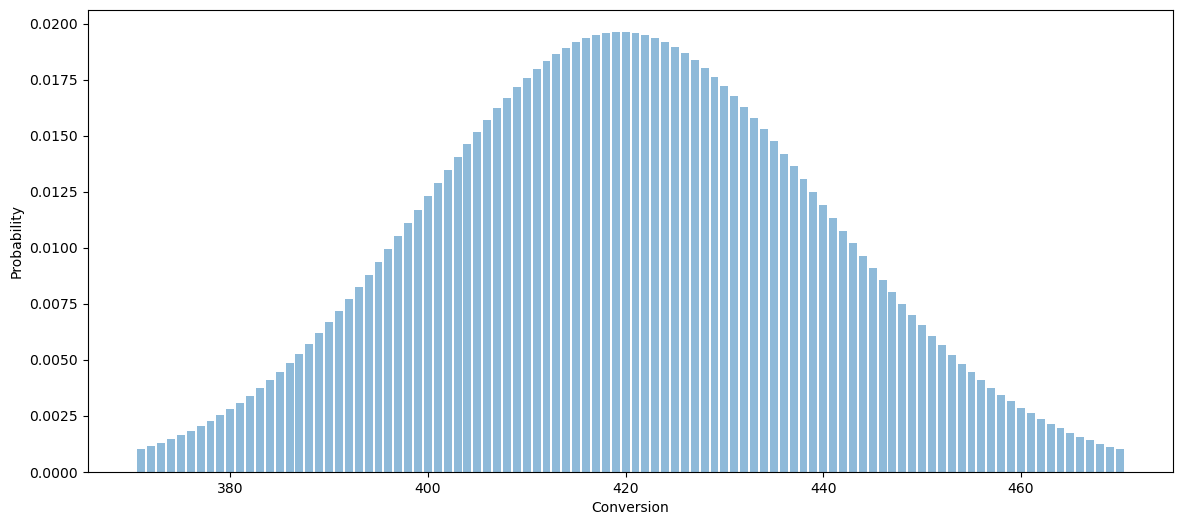

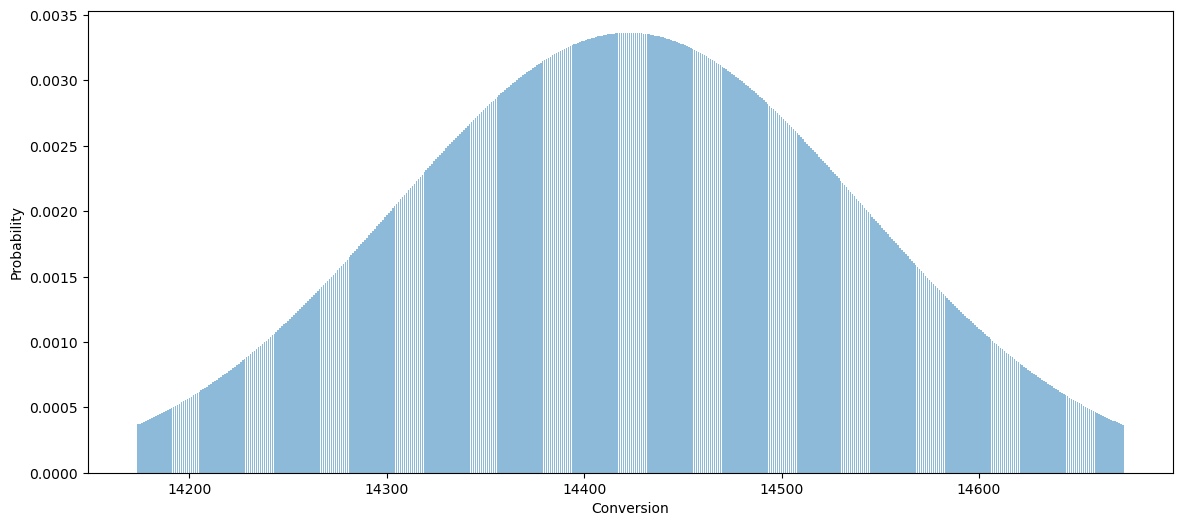

In [20]:
# Plot of the distribution of the 2 groups

# Plotting area for A
fig, ax = plt.subplots(figsize=(14, 6))
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()

# Plotting area for B
fig, ax = plt.subplots(figsize=(14, 6))
xB = np.linspace(convertido_B - 249, convertido_B + 250, 500)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()


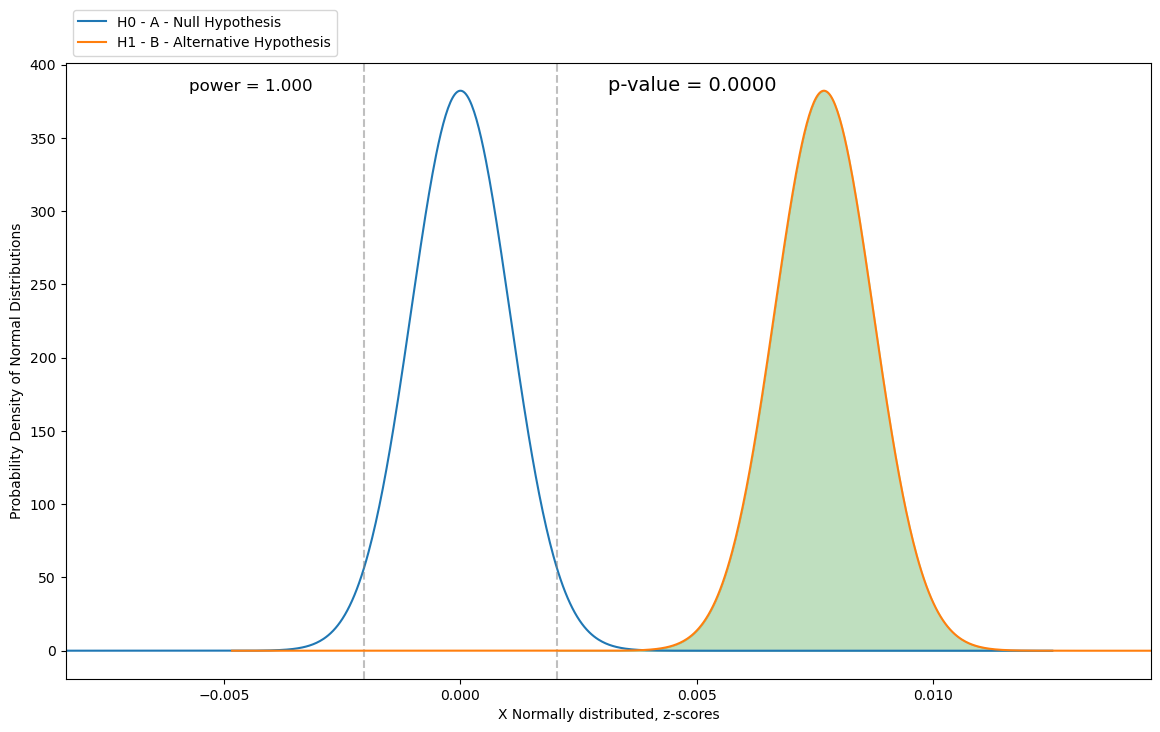

In [21]:
# Effect size, the difference between the values.
d_hat = p_conversao_b1 - p_conversao_a1
# Perform the A/B test function
abplot_func(total_A, total_B, p_conversao_a1, d_hat)

In [22]:
p_conversao_a1

0.01785410644448223

5. **Sample Size Determination:**

In [23]:
# Calculate the minimum sample size with two_sided = True
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power=0.8, sig_level=0.05, two_sided=True)

5631.787382615137

In [24]:
# Calculate the minimum sample size with two_sided = False
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power=0.8, sig_level=0.05, two_sided=False)

4436.155093472385

6. **Conclusions:**

# A/B Test - Conclusion

Based on the results of the conducted A/B test, we can draw the following conclusions:

- **Significant Difference:** We observed a statistically significant difference in conversion rates between groups A (control) and B (experimental).
  
- **Observed Effect:** The `d_hat` value was calculated at approximately 0.0077, indicating a small but statistically significant advantage for group B.

- **Statistical Evidence:** The associated p-value was practically zero, reinforcing the statistical evidence of the observed difference.

- **High Statistical Power:** The test exhibited high statistical power, reaching 1.0, indicating its ability to detect the difference when it truly exists.

- **Minimum Sample Size:** The minimum sample size was calculated with two_sided equal to True, resulting in 5631.79, and with two_sided equal to False, resulting in 4436.16.

These results suggest that the introduction of ads had a significant impact on conversion rates compared to the control group.
